In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import numpy as np
import seaborn as sns
df = pd.read_csv(r'C:\Users\User1\Desktop\Datasets\ai_data\ai_financial_market_daily_realistic_synthetic.csv')


In [51]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [52]:
#Show basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [54]:
# Convert datatype of Date column into DateTime format

df['Date'] = pd.to_datetime(df['Date'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


In [56]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [57]:
# Show the Companies Name

df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [60]:
# Create a new column for 'Year' only

df['Year'] = df['Date'].dt.year

In [61]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [64]:
# Event when GPT -4 was released

df[df['Event'] == 'GPT-4 release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.2,2023


In [65]:
# Check for null/missing values

df.isnull().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
Year                       0
dtype: int64

How much amount the companies spent on Research and Development?

In [69]:
print("Company's spending for Research and Development in $Bn")
RD =df.groupby("Company")['R&D_Spending_USD_Mn'].sum()/1000
RD

Company's spending for Research and Development in $Bn


Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

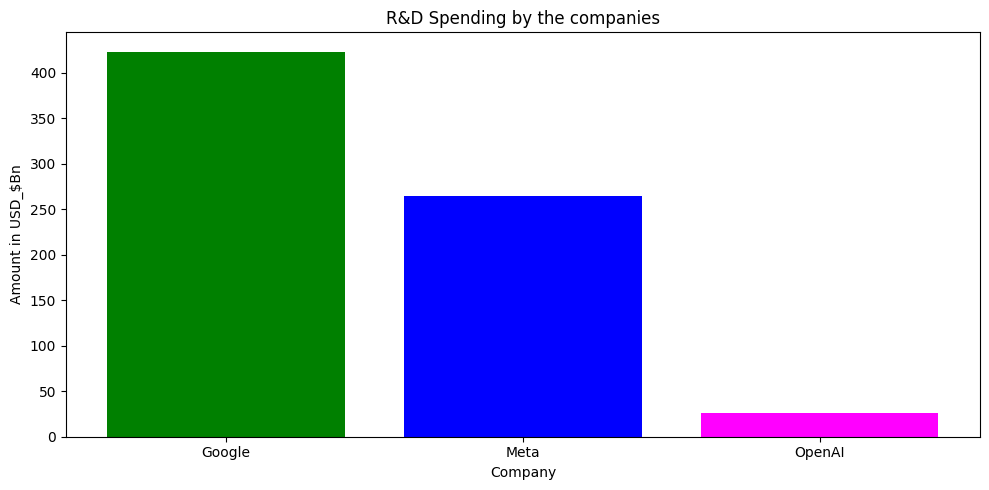

In [201]:
# Draw a Bar plot to show the amount spent on R&D by the companies
plt.figure(figsize = (10,5))
plt.bar(RD.index, RD.values, color = ['green', 'blue', 'magenta'])
plt.title('R&D Spending by the companies')
plt.xlabel('Company')
plt.ylabel('Amount in USD_$Bn')
plt.tight_layout()
plt.show()

#  Revenue Earned by the companies

In [76]:
print('Companies AI Revenue in USD Bn')

rev = df.groupby('Company')['AI_Revenue_USD_Mn'].sum()/1000

rev

Companies AI Revenue in USD Bn


Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64

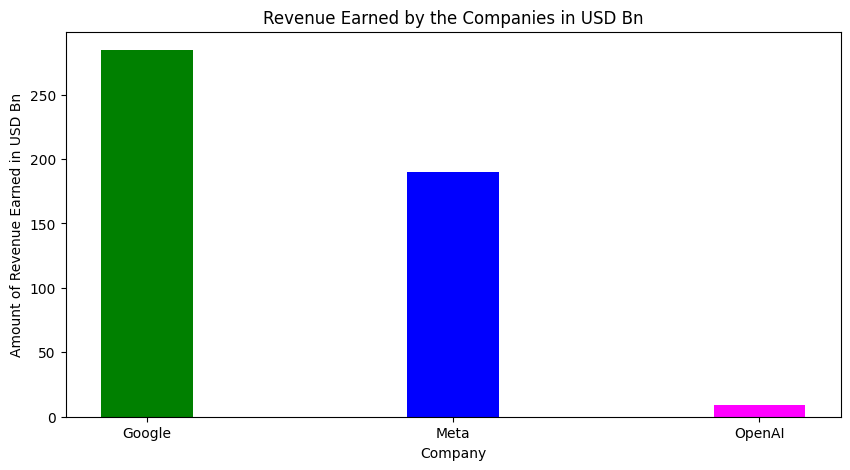

In [204]:
# Draw a Bar Plot to show the Revenues of the companies
plt.figure(figsize = (10,5))
plt.bar(rev.index, rev.values, color = ['green', 'blue', 'magenta'], width = 0.3)
plt.title('Revenue Earned by the Companies in USD Bn')
plt.xlabel('Company')
plt.ylabel('Amount of Revenue Earned in USD Bn')
plt.show()

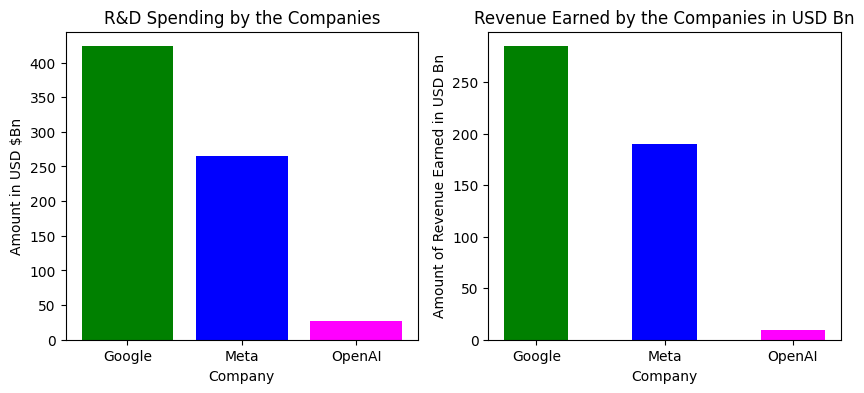

In [193]:
# Bar plots to show expenditure and Revenue of the compaies

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)

plt.bar(RD.index, RD.values, color = ['green', 'blue', 'magenta'])
plt.title('R&D Spending by the Companies')
plt.xlabel('Company')
plt.ylabel('Amount in USD $Bn')

plt.subplot(1,2,2)
plt.bar(rev.index, rev.values, color = ['green', 'blue', 'magenta'], width = 0.5)
plt.title('Revenue Earned by the Companies in USD Bn')
plt.xlabel('Company')
plt.ylabel('Amount of Revenue Earned in USD Bn')
plt.show()

## Datewise Impact on the Stock 

In [87]:
df.head() 

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


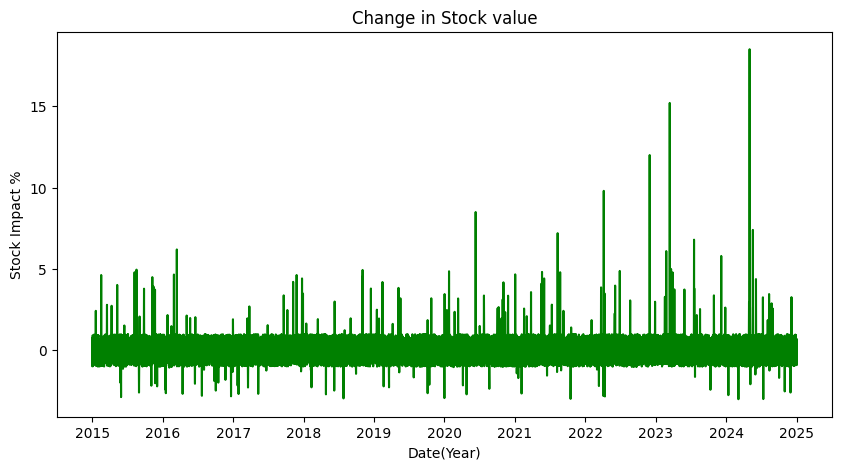

In [91]:
plt.figure(figsize = (10,5))

plt.plot(df['Date'], df['Stock_Impact_%'], color = 'green')

plt.title('Change in Stock value')
plt.xlabel('Date(Year)')
plt.ylabel('Stock Impact %')
plt.show()

## 3 seperate dataframes

In [92]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [96]:
data_openai = df [df['Company'] == 'OpenAI']

In [94]:
data_google = df [df['Company'] == 'Google']

In [95]:
data_meta = df [df['Company'] == 'Meta']

In [97]:
data_openai

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,2024


In [98]:
data_google

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,2015
...,...,...,...,...,...,...,...,...
7301,2024-12-27,Google,162.16,155.36,417.88,NaN,-0.46,2024
7302,2024-12-28,Google,159.69,154.47,414.89,NaN,-0.48,2024
7303,2024-12-29,Google,161.69,154.59,415.31,NaN,0.72,2024
7304,2024-12-30,Google,158.48,155.05,416.84,NaN,-0.17,2024


In [99]:
data_meta

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


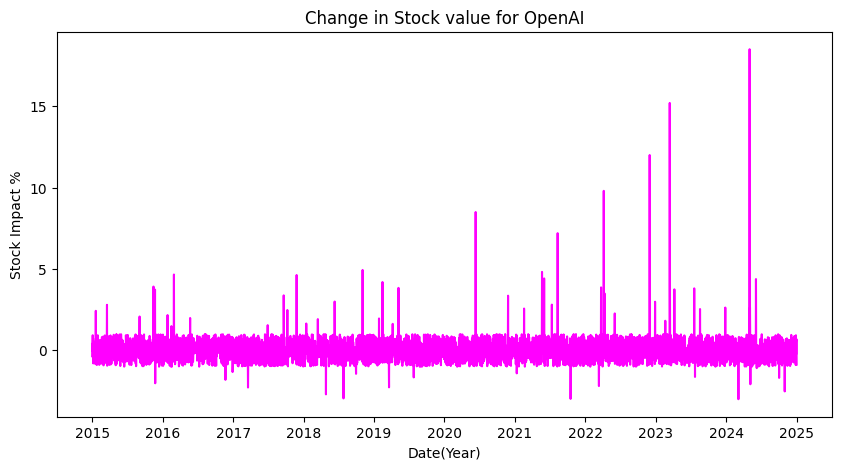

In [191]:
plt.figure(figsize = (10,5))
plt.plot(data_openai['Date'], data_openai['Stock_Impact_%'], color = 'magenta')
plt.title('Change in Stock value for OpenAI')
plt.xlabel('Date(Year)')
plt.ylabel('Stock Impact %')
plt.show()

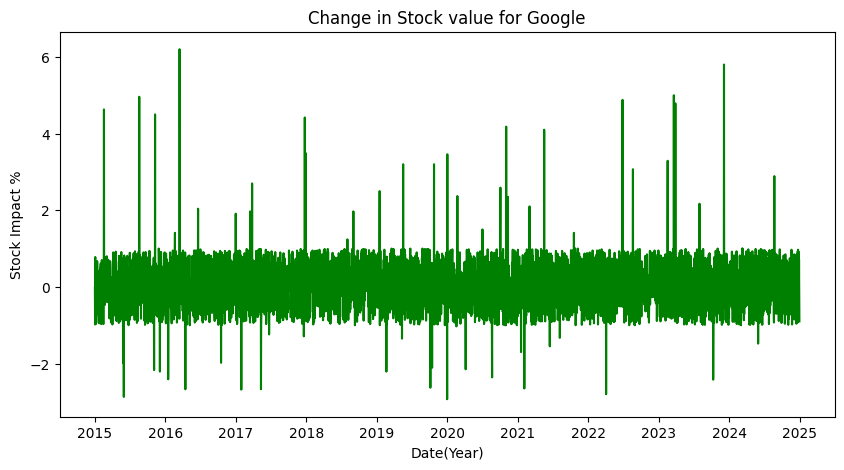

In [103]:
plt.figure(figsize = (10,5))
plt.plot(data_google['Date'], data_google['Stock_Impact_%'], color = 'green')
plt.title('Change in Stock value for Google')
plt.xlabel('Date(Year)')
plt.ylabel('Stock Impact %')
plt.show()

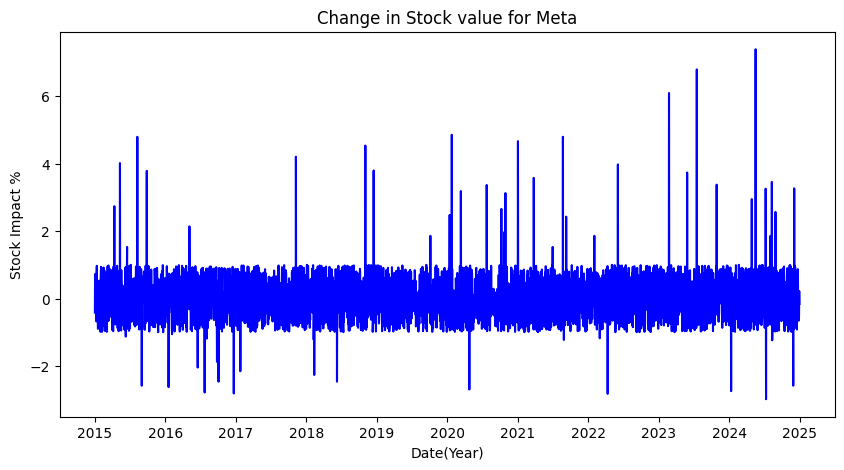

In [105]:
plt.figure(figsize = (10,5))
plt.plot(data_meta['Date'], data_meta['Stock_Impact_%'], color = 'blue')
plt.title('Change in Stock value for Meta')
plt.xlabel('Date(Year)')
plt.ylabel('Stock Impact %')
plt.show()

## Events when Maximum Stock Impact was observed

In [106]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [108]:
# OpenAI's Events when Maximum Stock Impact was observed

data_openai.sort_values( by = 'Stock_Impact_%', ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,2020
...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,2021


In [111]:
data_google.sort_values( by = 'Stock_Impact_%', ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


In [112]:
data_meta.sort_values( by = 'Stock_Impact_%', ascending = False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
7526,2015-08-09,Meta,48.97,19.95,-0.27,AI Video Recommendation upgrade,4.80,2015
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


## AI Revenue Growth  of the companies

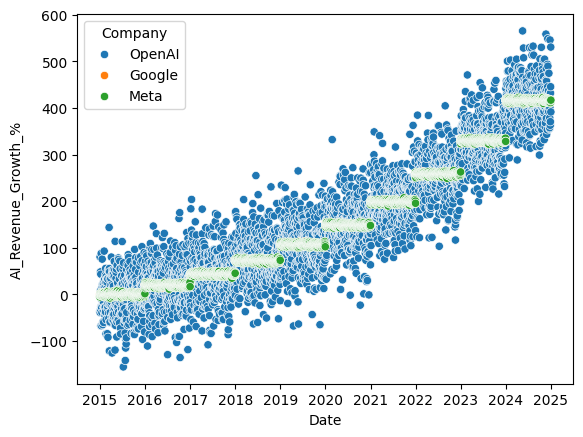

In [116]:
sns.scatterplot(x = 'Date', y = 'AI_Revenue_Growth_%', data = df, hue = 'Company')
plt.show()

In [117]:
df.sort_values(by = ['AI_Revenue_Growth_%'])

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
189,2015-07-09,OpenAI,5.66,-0.55,-155.43,NaN,0.70,2015
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,NaN,-0.62,2015
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,NaN,0.12,2016
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,NaN,-0.31,2016
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56,2015
...,...,...,...,...,...,...,...,...
3508,2024-08-09,OpenAI,9.92,6.33,532.86,NaN,0.77,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,NaN,0.45,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,NaN,-0.15,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,NaN,0.63,2024


## OpenAI's Revenue Growth year by year

In [118]:
data_openai

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,NaN,0.93,2024
3649,2024-12-28,OpenAI,9.67,5.32,432.15,NaN,-0.25,2024
3650,2024-12-29,OpenAI,9.17,5.46,445.74,NaN,0.47,2024
3651,2024-12-30,OpenAI,10.36,6.31,530.88,NaN,0.69,2024


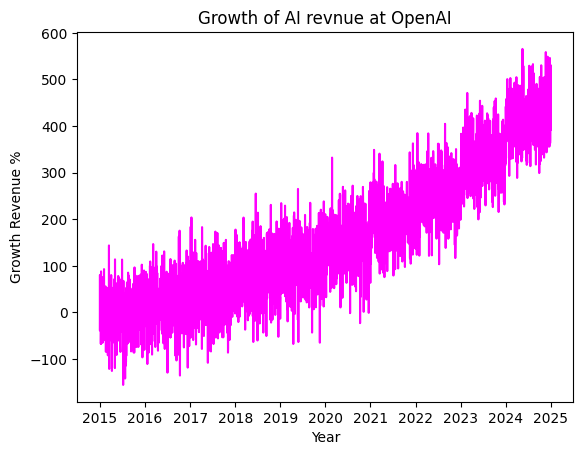

In [190]:
plt.plot(data_openai['Date'], data_openai['AI_Revenue_Growth_%'], color = 'magenta')
plt.title('Growth of AI revnue at OpenAI')
plt.xlabel("Year")
plt.ylabel("Growth Revenue %")
plt.show()

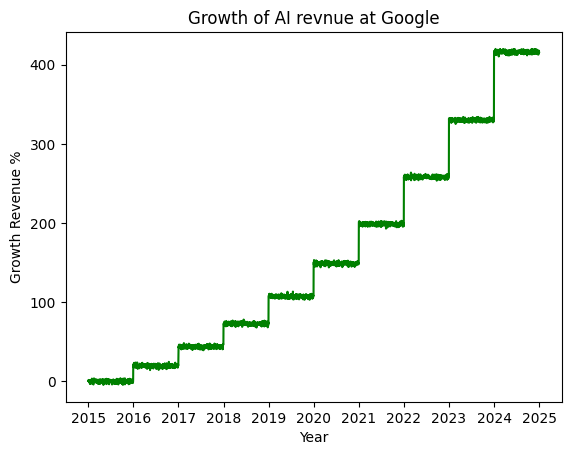

In [130]:
plt.plot(data_google['Date'], data_google['AI_Revenue_Growth_%'], color = 'green')
plt.title('Growth of AI revnue at Google')
plt.xlabel("Year")
plt.ylabel("Growth Revenue %")
plt.show()

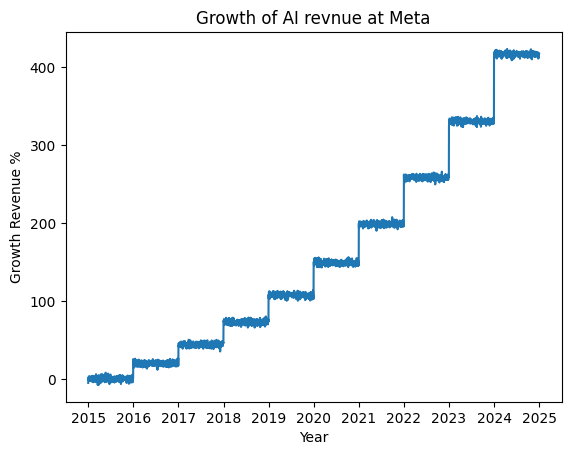

In [215]:
plt.plot(data_meta['Date'], data_meta['AI_Revenue_Growth_%'])
plt.title('Growth of AI revnue at Meta')
plt.xlabel("Year")
plt.ylabel("Growth Revenue %")
plt.show()

## Correlation between the columns

<Axes: >

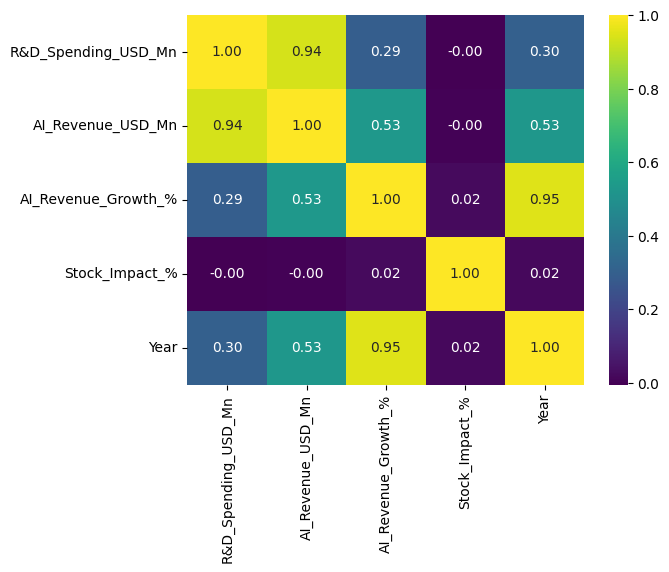

In [208]:
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='viridis', fmt= '.2f')

## Expenditure vs Revenue year by year

In [132]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [134]:
spend = df.groupby("Year")['R&D_Spending_USD_Mn'].sum()

spend

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

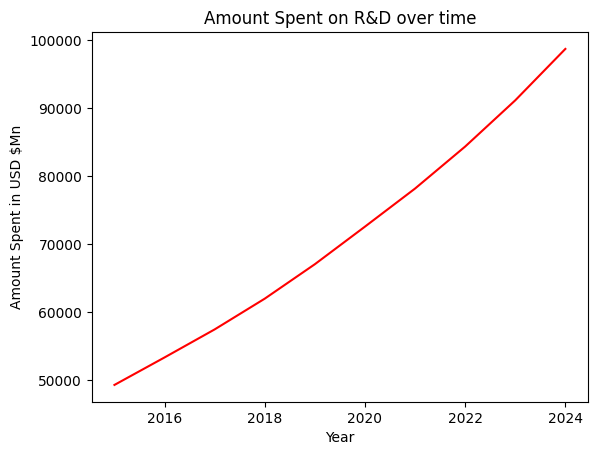

In [140]:
# Showing the amount spent on R & D

plt.plot(spend.index, spend.values, color = 'r')
plt.title('Combined R&D spending over time')
plt.xlabel('Year')
plt.ylabel("Amount Spent in USD $Mn")
plt.show()

In [142]:
revenue = df.groupby('Year')['AI_Revenue_USD_Mn'].sum()

revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

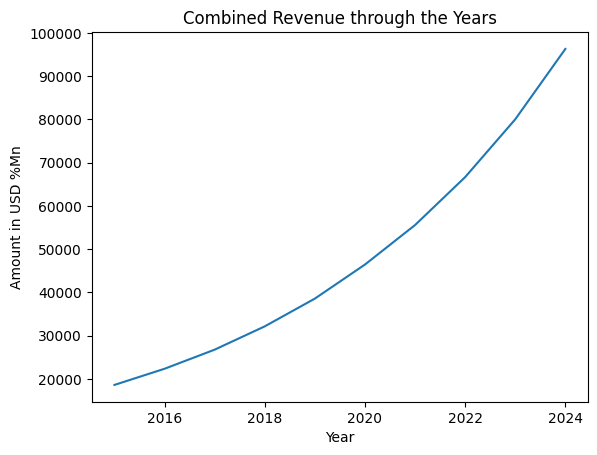

In [145]:
# Showing the Revenue earned

plt.plot(revenue.index, revenue.values)
plt.title('Combined Revenue through the Years')
plt.xlabel('Year')
plt.ylabel('Amount in USD %Mn')
plt.show()

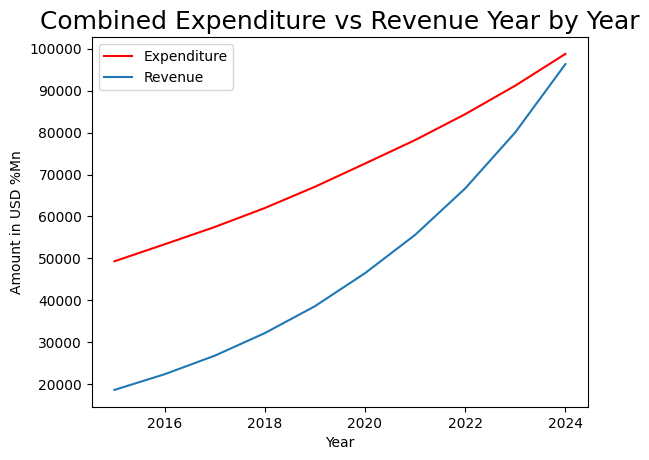

In [147]:
plt.plot(spend.index, spend.values, color = 'r')
plt.plot(revenue.index, revenue.values)
plt.title('Combined Expenditure vs Revenue Year by Year', fontsize = 18)
plt.xlabel('Year')
plt.ylabel('Amount in USD %Mn')
plt.legend(['Expenditure', 'Revenue'])

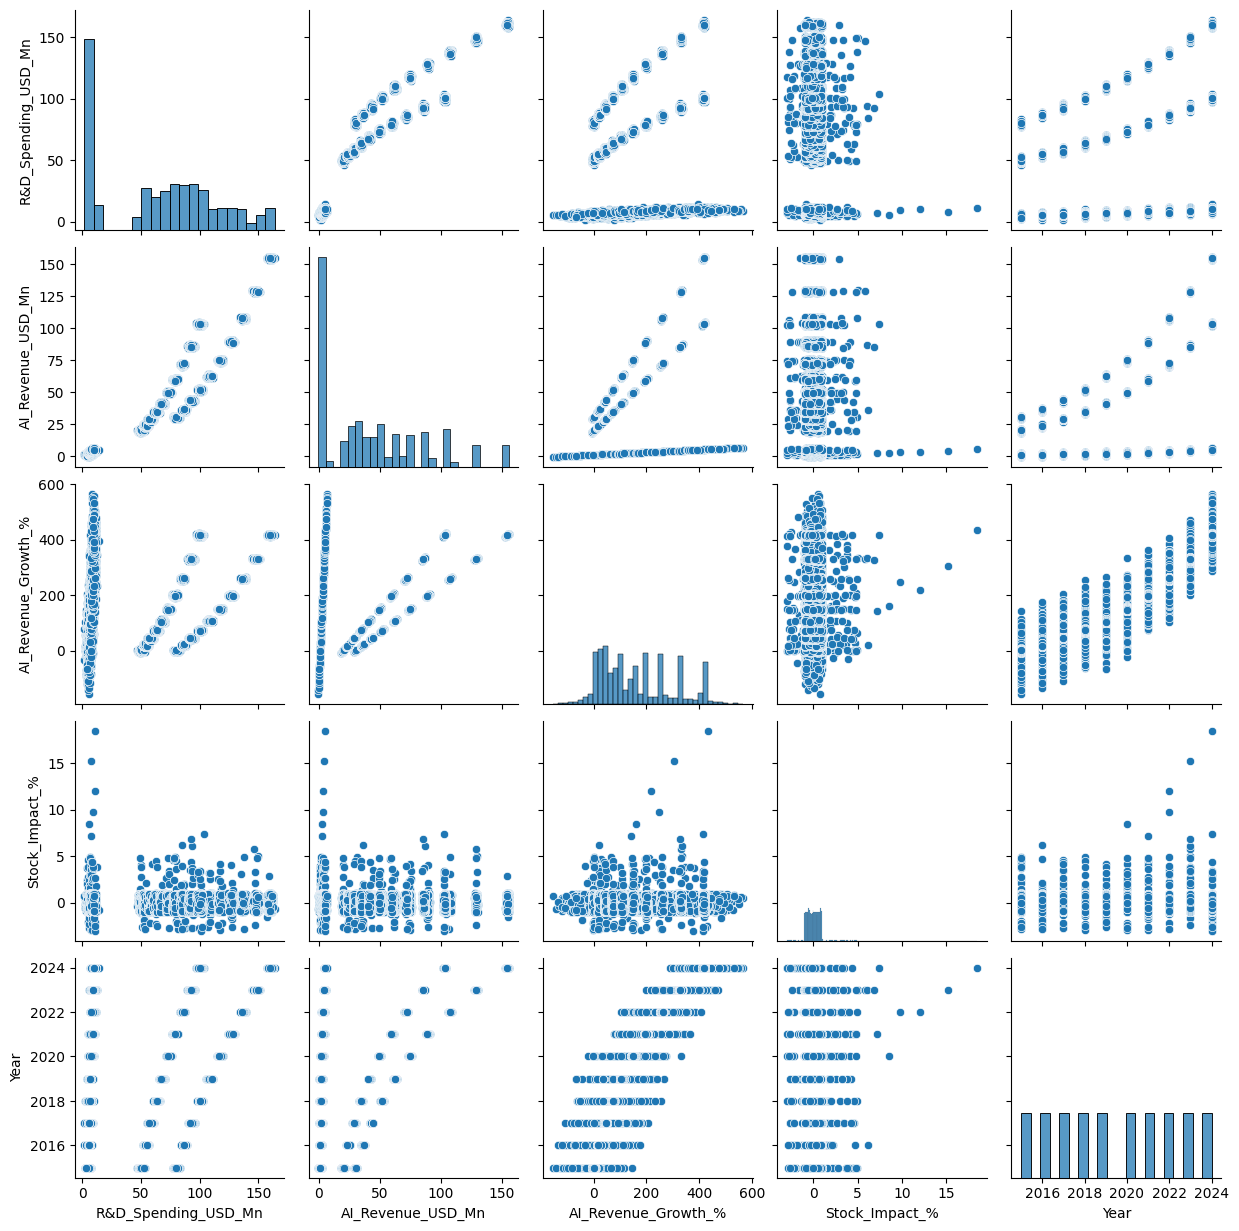

In [148]:
# Pairplot to show the relations between the columns

sns.pairplot(df);

## Event Impact Analysis

In [150]:
# Showing the various Events
df.Event.value_counts()

Event
AI speech recognition release      37
AI Ads Optimization upgrade        32
AI partnership deal                32
AI-powered search update           32
AI Video Recommendation upgrade    29
AI ethics policy update            27
Cloud AI launch                    27
GPT-1 release                       1
GPT-2 release                       1
GPT-3 release                       1
Codex release                       1
DALL·E 2 release                    1
ChatGPT (GPT-3.5) launch            1
GPT-4 release                       1
GPT-5 release (predicted)           1
TensorFlow open-source release      1
AlphaGo beats Lee Sedol             1
BERT for Search launch              1
MUM Search Model launch             1
Bard chatbot launch                 1
Gemini AI release                   1
LLaMA 1 release                     1
LLaMA 2 release                     1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [162]:
# Checking for a particular event

df[df.Event == 'TensorFlow open-source release']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3965,2015-11-09,Google,79.62,29.84,-0.53,TensorFlow open-source release,4.5,2015


In [155]:
tf = df.loc[3955: 3975]
tf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3955,2015-10-30,Google,80.33,29.87,-0.43,NaN,0.43,2015
3956,2015-10-31,Google,79.53,30.30,0.99,NaN,-0.84,2015
3957,2015-11-01,Google,80.37,29.86,-0.48,NaN,0.57,2015
3958,2015-11-02,Google,77.89,29.97,-0.10,NaN,0.76,2015
3959,2015-11-03,Google,81.00,29.43,-1.89,NaN,-0.45,2015
3960,2015-11-04,Google,80.70,29.71,-0.96,AI speech recognition release,-2.17,2015
3961,2015-11-05,Google,78.31,30.25,0.85,NaN,0.31,2015
3962,2015-11-06,Google,79.08,29.84,-0.54,NaN,-0.72,2015
3963,2015-11-07,Google,79.65,30.34,1.14,NaN,0.58,2015
3964,2015-11-08,Google,79.63,29.74,-0.86,NaN,-0.61,2015


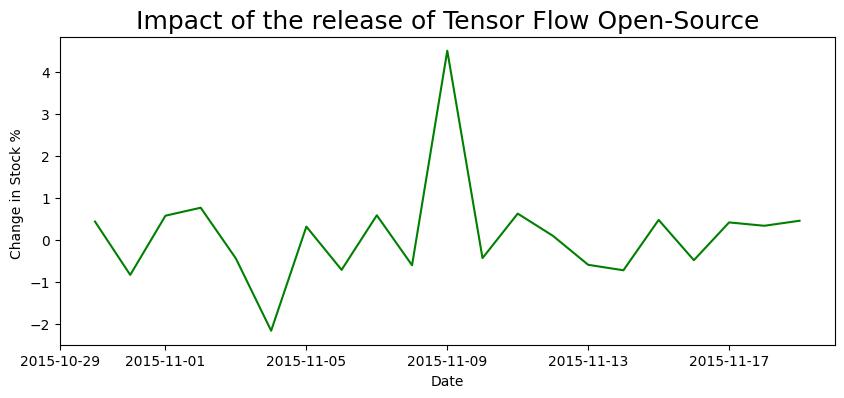

In [196]:
# Showing the impact of Tensor Flow Open source Releaase

plt.figure(figsize = (10,4))

plt.plot(tf['Date'], tf['Stock_Impact_%'], color = 'green')
plt.title('Impact of the release of Tensor Flow Open-Source', fontsize = 18)
plt.xlabel('Date')
plt.ylabel('Change in Stock % ')
plt.show()

In [166]:
# Checking for a particular event
df[df.Event == 'GPT-4 release']


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.2,2023


In [167]:
gpt4 = df.loc[2984:3004]

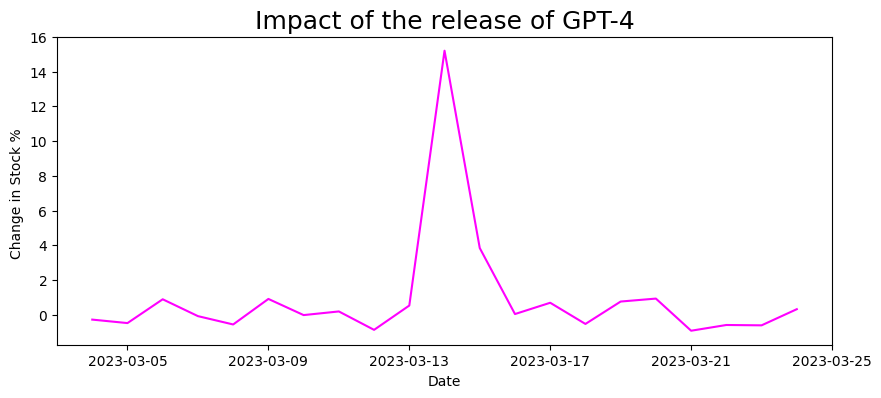

In [175]:
# Showing the impact with a line chart
plt.figure(figsize = (10,4))

plt.plot(gpt4['Date'], gpt4['Stock_Impact_%'], color = 'magenta')
plt.title('Impact of the release of GPT-4', fontsize = 18)
plt.xlabel('Date')
plt.ylabel('Change in Stock % ')
plt.show()

In [176]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [178]:
# Daily Average impact on the Stocks of the companies

df.groupby("Company")['Stock_Impact_%'].mean()

Company
Google    0.026209
Meta      0.009762
OpenAI    0.040709
Name: Stock_Impact_%, dtype: float64

In [182]:
# Daily average Expenditure on R & D by the companies 

df.groupby('Company')['R&D_Spending_USD_Mn'].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

In [183]:
# Maximum impact % on a company's stocks

df.groupby('Company')['Stock_Impact_%'].max()

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

## Change in the Index wrt to Year & Company

In [186]:
# Highest change in the index

stocks = df.groupby(['Year', 'Company'])['Stock_Impact_%'].max()
stocks

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

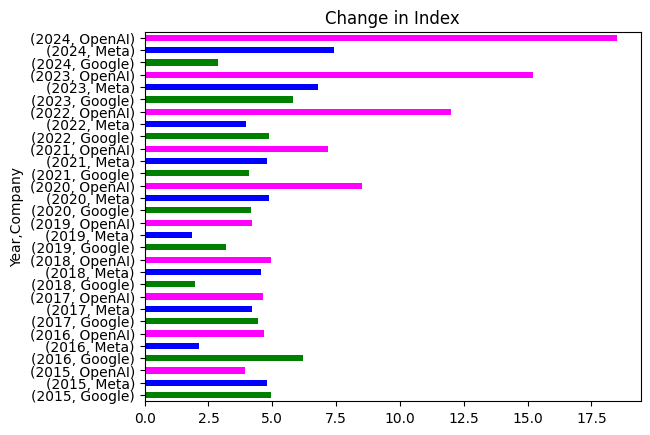

In [197]:
stocks.plot(kind = 'barh', color = ['green', 'blue', 'magenta'])
plt.title('Change in Index')
plt.show()